# Tutorial: Fourier Analysis and FFT

The purpose of this tutorial is to introduce Spectral Analysis to identify features of EEG signals. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
##THIS IS NEW
from scipy.fftpack import fft, ifft  #THIS IS THE NEW FUNCTION!
from hdf5storage import loadmat 


In [2]:
def sinusoid(f,t,A = 1,theta = 0):
    ''' makes a sinusoid of given frequency (f) at the time points given in t. 
    Amplitude (A) and phase (theta) can be optionally specified.  Phase is given in degrees not radians'''
    theta = theta*np.pi/180 #convert theta from degrees to radians
    e = A*np.cos(2*np.pi*f*t+theta)
    return e


### Orthogonality 

* When we work with vectors ($\boldsymbol{x}$ and $\boldsymbol{y}$), the definition of perpendicular is that the dot product between the vectors is zero 

$$ \boldsymbol{x} \cdot \boldsymbol{y} = 0 $$

* we use the concept of perpendicular to define a coordinate axis. For example, the x and y axis in a plane are perpendicular to each other.

* When working with functions, the concept of perpendicular is called **orthogonal**.  

* $f(x)$ and $g(x)$ are orthogonal if and only

 $$ \int_{-\infty}^{\infty} f(x)g(x) dx = 0 $$

* The limits of the integral above are the domain of the function.  


### Orthogonality of Sinusoidal Functions 

$$ \int_{-\pi}^{\pi} sin(ux) sin(vx) dx = 0 \: \text{if} \: u \neq v $$
$$ \int_{-\pi}^{\pi} sin(ux) sin(vx) dx = \pi \: \text{if} \: u = v $$

$$ \int_{-\pi}^{\pi} cos(ux) sin(ux) dx = 0$$ 

* Two sine or cosine functions are orthogonal over a complete cycle of the oscillation.   

### Time functions 

$$ \int_{0}^{T} sin(\frac{2n\pi t}{T}) sin(\frac{2m\pi t}{T}) dx = 0 \: \text{if} \: n \neq m $$
$$ \int_{0}^{T} sin(\frac{2n\pi t}{T}) sin(\frac{2m\pi t}{T}) dx = \frac{T}{2} \: \text{if} \: n = m $$

$$ \int_{0}^{T} sin(\frac{2n\pi t}{T}) cos(\frac{2n\pi t}{T}) dx = 0$$ 

* Two sine or cosine functions are orthogonal over a complete cycle of the oscillation.

In [3]:
samplingrate = 100 # this is the rate at which the signal is sampled.  
ts = 1/samplingrate #  this is the interval in time between samples.  
T = 1 #This is the total length (in seconds) of the interval. 
t = np.arange(0,T,ts) #this is the time time vector with 1 value of time for each sample.  
#manipulate phase (theta) 
es = dict()
f = [5,4]
nsamp = np.size(t)
es[0] = sinusoid(f[0],t,theta = 0)
es[1] = sinusoid(f[1],t,theta = 0)
dp = np.sum(es[0]*es[1])/nsamp 
#dp = np.dot(es[0],es[1])/nsamp
print(dp)

-1.6653345369377348e-16


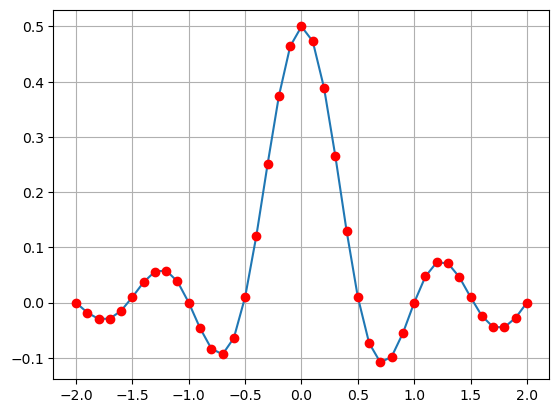

In [4]:
samplingrate = 100 # this is the rate at which the signal is sampled.  
ts = 1/samplingrate #  this is the interval in time between samples.  
T = 1 #This is the total length (in seconds) of the interval. 
t = np.arange(0,T,ts) #this is the time time vector with 1 value of time for each sample.  
#manipulate phase (theta) 
es = dict()
f = np.arange(3,7.1,0.1)
fplot = f-5;
nof = np.size(f)
nsamp = np.size(t)
dp = np.zeros(nof)
for j in range(nof):
    es[0] = sinusoid(f[j],t)
    es[1] = sinusoid(5,t)
    dp[j] = np.dot(es[0],es[1])/nsamp 
plt.plot(fplot,dp)
plt.plot(fplot,dp,'ro')
plt.grid()

#### Discrete Fourier Series

* Given x(t) of length N samples, 

$$ x(t) = A_0 + \sum_{n=1}^{N/2}{A_f[cos(2\pi{f_nt})] +B_f[sin(2\pi{f_nt})]}$$

* A more useful formulation makes use of Eulers identity. 

$$ x(t) = \sum_{n=-N/2}^{N/2}{X_f[cos(2\pi{f_nt}) -i\cdot sin(2\pi{f_nt})]}$$

$$ x(t) = \sum_{n=-N/2}^{N/2}{X_f[exp^{(i 2\pi{f_nt})}]}$$

$$ f_n = \frac{n}{T}, n = -N/2+1, ... N/2-1,N/2 $$ 

* See below for why we think in terms of -N/2+1 

#### Linear Algebra equivalency 

* consider a matrix \boldsymbol{F} whose columns are the vectors defined as 

$$ \boldsymbol{F} = [cos(2\pi{f_nt}) \: sin(2\pi{f_nt}], f_n = \frac{n}{T}, n = 1, ... N/2-1,N/2 $$

* Such a matrix would have N columns and N rows.
* Such a matrix would be orthogonal since the dot product of the columns would be zero. 
* Therefore,  multiplying the data by this matrix represents a rotation of the time series, just like we discussed in PCA. 
* With a little algebra it is easy to show that the same matrix can be written for complex valued columns with inner products of zero.  


### DFT - Discrete Fourier Transform

* The DFT can transform a sequence of evenly spaced signal to the information about the frequency of all the sine waves that needed to sum to the time domain signal. 

* The first expression above represents the time series x as a sum of sin and cosine functions up to the highest allowable frequency with N samples with is N/2. 

* We can make use of *Euler's formula*, which links the trigonometric functions to the complex exponential function: $e^{i\cdot x} = cosx+i\cdot sinx$ to generate the 3rd expression. This is the critical expression of the Fourier series.  

$$ X_f = A_f + i\cdot B_f $$

Note that the $X_f$ is a complex number that encodes both the amplitude and phase information of a complex sinusoidal component $e^{i\cdot 2\pi f_n t}$ of function $x(t)$. The amplitude and phase of the signal can be calculated as:

$$Amplitude = |X_f|= \sqrt{Re(X_f)^2 + Im(X_f)^2}$$

$$Phase = arctan(\frac{Im(X_f)}{Re(X_f)})$$

where $Im(X_f)$ and $Re(X_f)$ are the imaginary and real part of the complex number, $X_f$




#### Amplitude 

* The amplitude returned by DFT equal to the amplitudes of the signals fed into the DFT if we normalize it by the number of sample points. 

* However, the FFT algorithm considers both positive and negative frequencies as in the definition of the Fourier Series above.  

* If the input signal is a real-valued sequence as we described the spectrum of the positive and negative frequencies will be symmetric

* In practice, we will only look at the positive frequencies and multiply by 2 to get the amplitude corresponding to the time domain signal.


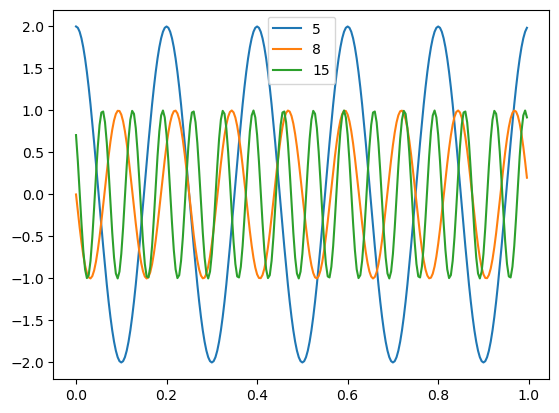

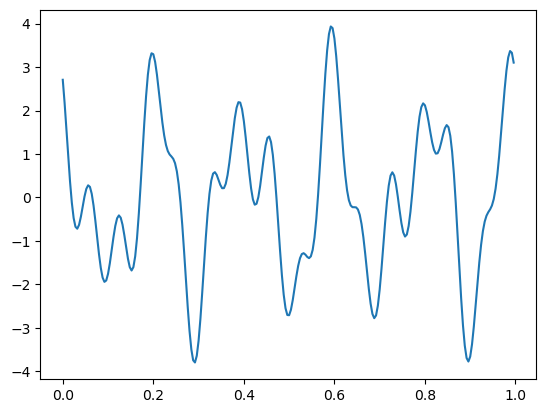

In [5]:
samplingrate = 250 # this is the rate at which the signal is sampled.  
ts = 1/samplingrate #  this is the interval in time between samples.  
T = 1 # total length of samples
t = np.arange(0,T,ts) #this is the time time vector with 1 value of time for each sample.  
#manipulate phase (theta) 
nsamp = np.size(t)
es = dict()
es[1] = sinusoid(5,t,A=2,theta = 0)
plt.plot(t,es[1])
es[2] = sinusoid(8,t,A=1,theta = 90)
plt.plot(t,es[2])
es[3] = sinusoid(15,t,A=1,theta = 45)
plt.plot(t,es[3])
plt.legend(['5','8','15'])
plt.show()
es[4] = es[1]+es[2]+es[3]
plt.figure()
plt.plot(t,es[4])
plt.show()

* To get the amplitude I will take the absolute value and multiply by 2

In [6]:
xf = fft(es[4])
amplitude = 2*np.abs(xf)/nsamp 
nf = int(np.floor(nsamp/2))
f_n = np.arange(0,nf+1)/T

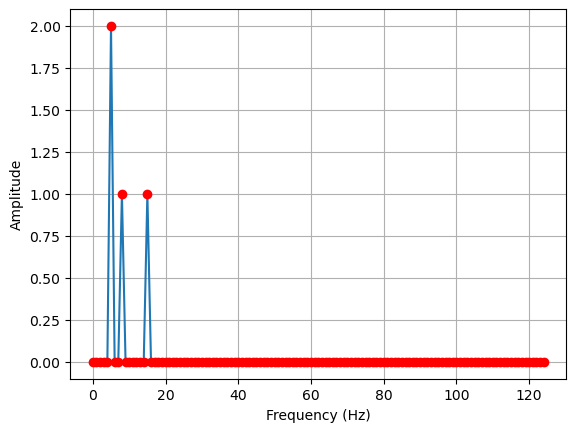

In [7]:
plt.plot(f_n[0:nf],amplitude[0:nf])
plt.plot(f_n[0:nf],amplitude[0:nf],'ro')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [8]:
print(xf[-20:])

[ 4.36180111e-14-7.94161887e-14j  6.67498916e-14-7.49590924e-14j
  9.40871082e-14+1.38240416e-14j  4.74083212e-14-1.11900249e-13j
  2.50310413e-13-2.62742071e-13j  8.83883476e+01-8.83883476e+01j
 -2.10204401e-13+1.13586461e-13j  2.05436071e-14+1.61870678e-13j
 -1.02109131e-14+9.99246297e-14j -8.66904608e-14+7.95319167e-14j
 -7.72574258e-14+4.68780218e-14j  1.23935412e-14+5.60430150e-14j
 -2.15448922e-14-1.25000000e+02j -7.54368149e-14+8.61391942e-14j
 -4.55078837e-14+2.58589306e-14j  2.50000000e+02+3.68594044e-14j
 -1.12892662e-13+7.91712228e-14j -9.58485887e-14-7.24255426e-14j
  5.73087970e-15+2.82732890e-14j -5.75095815e-14-6.71744650e-14j]


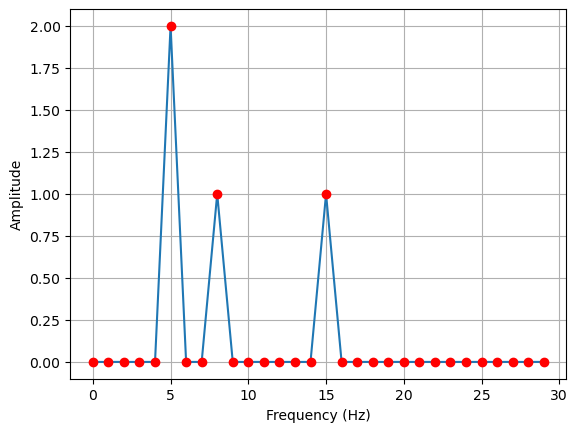

In [9]:
plt.plot(f_n[0:30],amplitude[0:30])
plt.plot(f_n[0:30],amplitude[0:30],'ro')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

* The estimate is robust to noise  

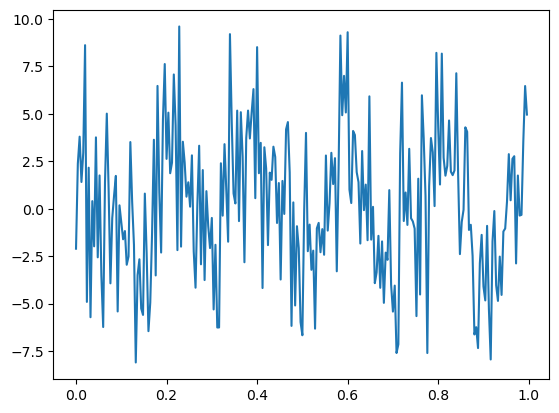

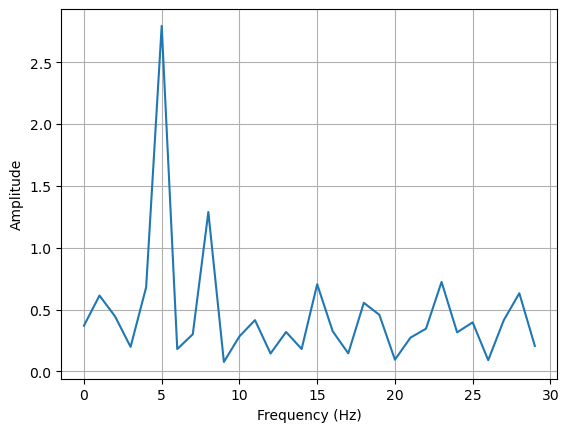

In [10]:
myseed = 1234
rng = np.random.default_rng(seed = myseed)
noise = rng.normal(0,3,nsamp) #random numbers with a mean of 0 
                              # and standatd deviation as 2nd parameter
signalwnoise = es[4]+ noise
plt.plot(t,signalwnoise)
plt.show()
sn_fft = fft(signalwnoise)
amplitude = 2*np.abs(sn_fft)/nsamp


plt.plot(f_n[0:30],amplitude[0:30])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()



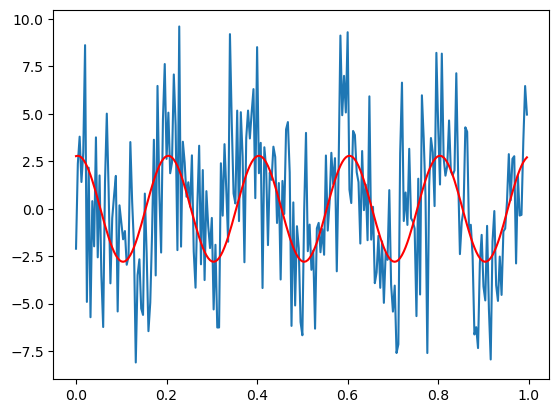

In [11]:
phase = np.angle(sn_fft)
phase = phase*180/np.pi
estimated5Hz = sinusoid(5,t,A=amplitude[5],theta = phase[5])
plt.plot(t,signalwnoise)
plt.plot(t,estimated5Hz,'r')
plt.show()

## Spectral Analysis 

* In many disciplines, including neuroscience, spectral analysis is often the starting point in analyzing time seres data. 

* Spectral analysis is the analysis of the frequency content of the signals being observed.

* Its foundational in analyzing human EEG but also Local Field Potentials (LFP) obtained from inserting electrodes into animal models 

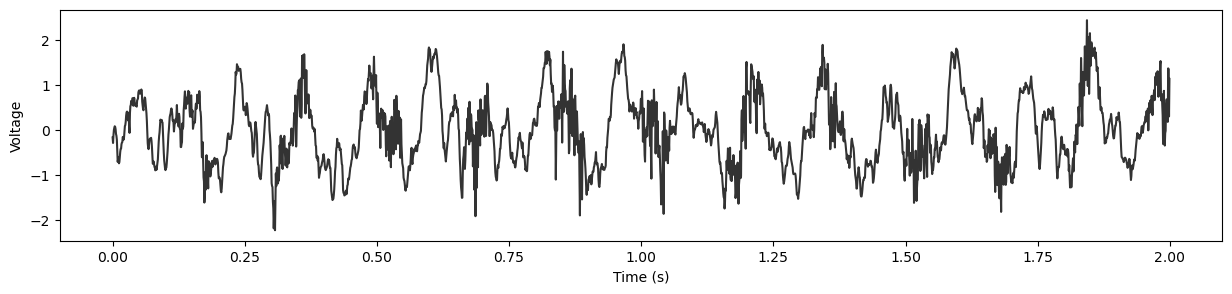

In [14]:
data = loadmat('../data/LFP.mat', squeeze_me=True)

# unpack the variables
fs = data['fs'] # sampling rate 
deltaT = 1/fs # time steps

lfp = data['lfp'][0,:]/1000 # this file contains two channels, we'll only work with the first one
lfp_short = lfp[:int(2*fs)] # make a variable that has only the first two seconds of the LFP
t_short = np.arange(0, len(lfp_short)*deltaT, deltaT) # create the corresponding time vector

plt.figure(figsize=(15,3))
plt.plot(t_short,lfp_short, 'k', alpha=0.8)
plt.xlabel('Time (s)');plt.ylabel('Voltage');
plt.show()

* The plot above has the local field potential (LFP) recorded in the rat hippocampus. This dataset comes from an openly accessible neuroscience database. For more information on this particular dataset, see [here](https://crcns.org/data-sets/hc/hc-2/about-hc-2).

* You will notice that the LFP signal has a very prominent rhythmic component, with peaks near, for example, 0.25, 0.37, and 0.5 seconds. Therefore, it has a **periodicity of about 0.125 seconds**, or a **frequency of 8Hz**. This is a very famous brain oscillation, called the theta oscillation which is central to memory functions.  There is also some faster oscillations observable in the plot.  

Analuze the first 2 secs of data. 

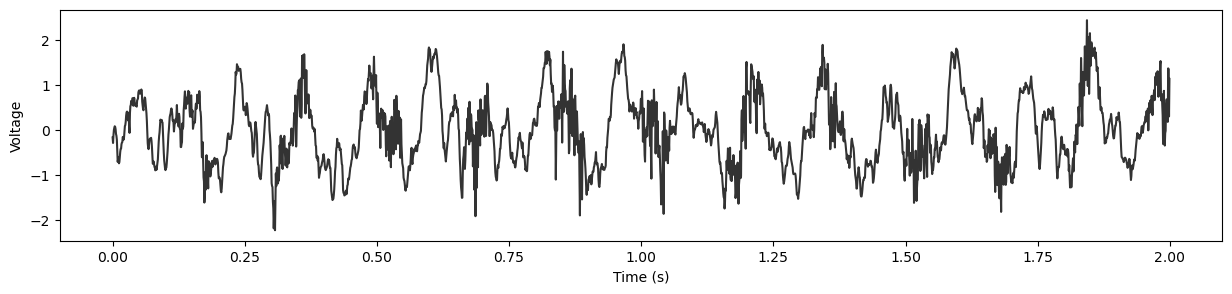

In [15]:
data = loadmat('../data/LFP.mat', squeeze_me=True)


# unpack the variables
fs = data['fs'] # sampling rate 
deltaT = 1/fs # time steps
T = 2# segment length 
nsamp = T*fs # number of samples is the segment length

lfp = data['lfp'][0,:]/1000 
lfp_short = lfp[range(0,nsamp)] # make a variable that has only the first T seconds of the LFP
t_short = np.arange(0, nsamp*deltaT, deltaT) # create the corresponding time vector
plt.figure(figsize=(15,3))
plt.plot(t_short,lfp_short, 'k', alpha=0.8)
plt.xlabel('Time (s)');plt.ylabel('Voltage');
plt.show()

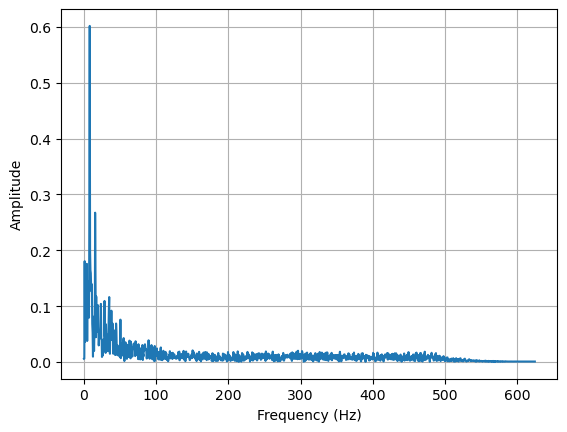

In [16]:
#part a
xf = fft(lfp_short) #take the fft 
amplitude = 2*np.abs(xf)/nsamp
nf = int(np.floor(nsamp/2)) #number of frequencies you can estimate is 1/2 the number of samples.
                            #I used floor just in case nsamp is odd. 
f_n = np.arange(0,nf)/T  #These are the frequencies that you can estimate. 
plt.plot(f_n,amplitude[0:nf])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


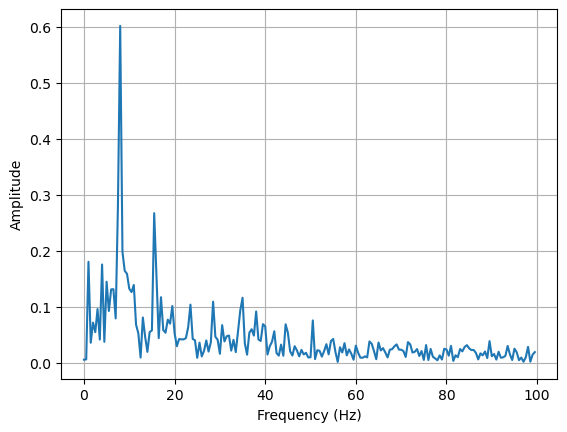

In [17]:
deltaF = 1/T  #frequency steps
maxf = 100  #highest frequency I want to plot
maxbin = int(maxf/deltaF) #index to highest frequency I wasnt to plot 
plt.plot(f_n[0:maxbin],amplitude[0:maxbin])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


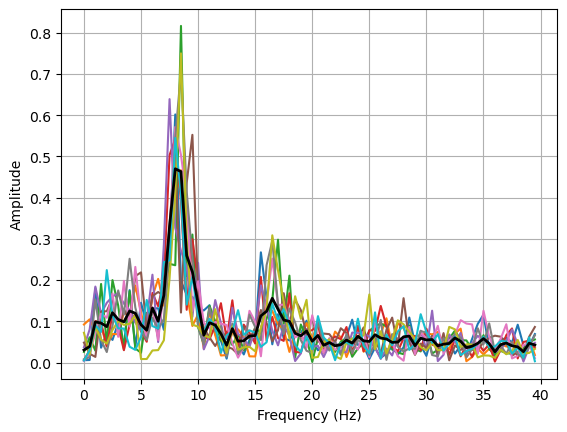

In [18]:
# lets get 10 epochs, compute fft and plot 
# also plot the averaging them together. 
T = 2# segment length 
nsamp = T*fs # number of samples is the segment length
deltaF = 1/T  #frequency steps
nf = int(np.floor(nsamp/2)) #number of frequencies you can estimate is 1/2 the number of samples.
                            #I used floor just in case nsamp is odd. 
f_n = np.arange(0,nf)*deltaF # the frequencies resolved by the fft 
maxf = 40  #highest frequency I want to plot
maxbin = int(maxf/deltaF) #index to highest frequency I wasnt to plot 
nepochs = 10
amplitude = np.zeros((nepochs,nf)) #I made an empty array to hold the amplitude spectra of each frequency 
for j in range(nepochs):
    lfp_short = lfp[range(j*nsamp,(j+1)*nsamp)]
    xf = fft(lfp_short)
    amplitude[j,:] = 2*np.abs(xf[0:nf])/nsamp #always divide by number of samples. 2 x for negative frequencies 
    plt.plot(f_n[0:maxbin],amplitude[j,0:maxbin]) #plot the individual epoch spectra (YOU DONT NEED TO DO THIS FOR THE HWK)
amplitude_avg = np.mean(amplitude,axis = 0) #take the average over all epochs
plt.plot(f_n[0:maxbin],amplitude_avg[0:maxbin],'k',linewidth=2) 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
